# <font color='red'>Face_Mask_Detection_TL_MobileNetV2(Training)(Kaggle_Data)</font>
### The Data used here can be found through  <a href="https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset" target="_blank">`This Link`</a> on Kaggle Website. 

## All work here is done on `CoLab` 

## <font color='green'>Description of This File</font> 

### The dataset contains one Zip File : `face-mask-12k-images-dataset.zip`.

### The Steps, i follow in this Notebook are:

1. Go to Kaggle Setting and download the API Key of Kaggle as `kaggle.jason` file, to Download the data direct from Kaggle to Colab.
2. Go to Colab and Upload the `kaggle.jason` file 
3. Create and check the directory to save jason file in it.
4. Copy the command from Kaggle to download the data in Colab.
5. UnZip the files and then delete the zip file to speed the run.
6. Import Libraries requied to show random images of the data.
7. Create CNN model and Training then evaluate, save and test the model.


## `The Target is to predicte if the person is wearing mask or not by CNN Model`
------------------
------------------

## Upload the API Key Of Kaggle (kaggle.jason)

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedsebaie","key":"389b378886b2451d2c68a6b86cbadab7"}'}

## Create and Check the Directory 

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Download the Data from Kaggle

In [3]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 329M/330M [00:03<00:00, 130MB/s]
100% 330M/330M [00:03<00:00, 105MB/s]


## Check the files we downloaded

In [4]:
!ls

face-mask-12k-images-dataset.zip  kaggle.json  sample_data


## Unzip The compressed train file

In [5]:
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [6]:
!rm face-mask-12k-images-dataset.zip

In [7]:
!ls

'Face Mask Dataset'   kaggle.json   sample_data


## Import Libraries requied to show random images 

### Define a function to load and display images

In [8]:

from os import listdir
from PIL import Image as PImage
import random
%matplotlib inline
from matplotlib import pyplot as plt
def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImgs = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImgs.append(img)
             
    for im in loadedImgs:
        im.show()

    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(random.sample(loadedImgs, 10)):
        plt.subplot(len(random.sample(loadedImgs, 10)) / columns + 1, columns, i + 1)
        plt.imshow(image) 
    return 
  


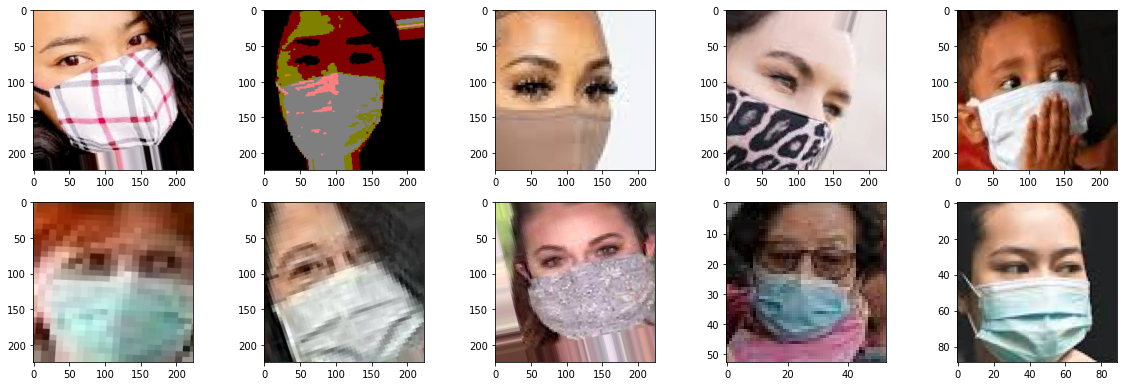

In [12]:
path = "/content/Face Mask Dataset/Train/WithMask/"
loadImages(path)

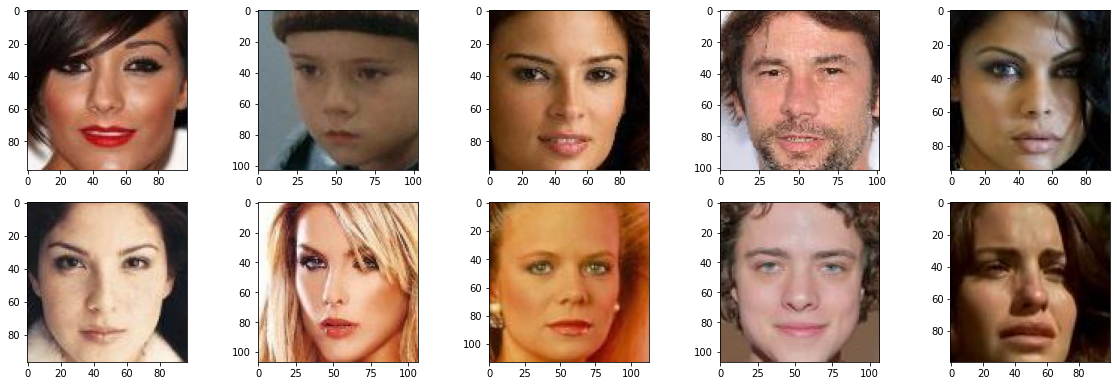

In [13]:
path = "/content/Face Mask Dataset/Train/WithoutMask/"
loadImages(path)

## CNN Model

## Import Libraries

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNet,MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Load data

In [17]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = ImageDataGenerator( 
	rescale=1./255,
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# Use datagen object to preprocess the data
train_generator = datagen.flow_from_directory(
    "/content/Face Mask Dataset/Train/",
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

# I using the same object for preprocess data validation
val_generator = datagen.flow_from_directory(
    "/content/Face Mask Dataset/Validation/",
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [19]:
# for plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

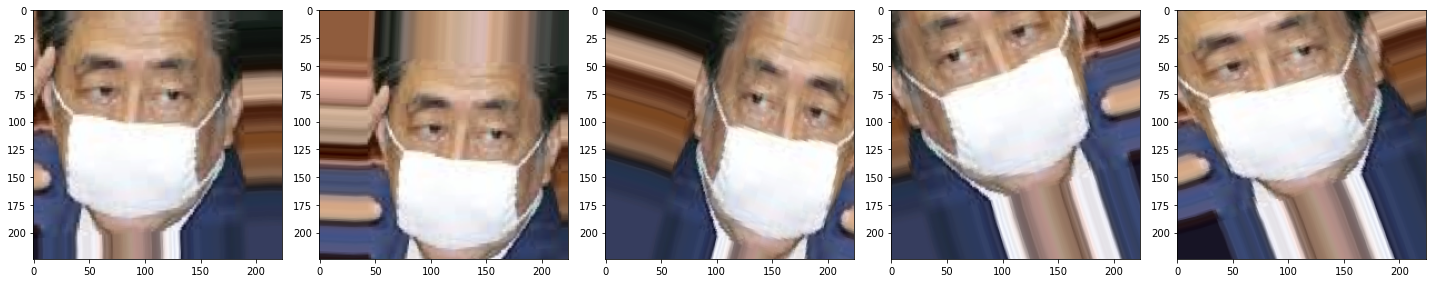

In [20]:
images = [train_generator[0][0][0] for i in range(5)]
plotImages(images)

In [21]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 2))

In [22]:
train_generator.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [37]:
train_steps = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps)
print(val_steps)

156
12


## Define a Model2 (Fine Tuning with vgg Model)

In [26]:
mobnetV2_conv = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [27]:
mobnetV2_conv.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [28]:
for layer in (mobnetV2_conv.layers):
    layer.trainable = False

In [29]:
mobnetV2_conv.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [32]:
model = Sequential()

# Add the MobilNetV2 convolutional base model
model.add(mobnetV2_conv)
model.add(AveragePooling2D(pool_size=(7, 7)))
# Add new layers
model.add(Flatten(name="flatten"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [33]:
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [35]:
checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

In [36]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 6


In [39]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=train_steps, 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=val_steps,
                    callbacks=[checkpoint])

Epoch 1/10
156/156 [==============================] - 487s 3s/step - loss: 0.2002 - accuracy: 0.9249 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 2/10
156/156 [==============================] - 477s 3s/step - loss: 0.0615 - accuracy: 0.9805 - val_loss: 0.0278 - val_accuracy: 0.9870
Epoch 3/10
156/156 [==============================] - 477s 3s/step - loss: 0.0469 - accuracy: 0.9839 - val_loss: 0.0138 - val_accuracy: 0.9974
Epoch 4/10
156/156 [==============================] - 481s 3s/step - loss: 0.0411 - accuracy: 0.9849 - val_loss: 0.0230 - val_accuracy: 0.9896
Epoch 5/10
156/156 [==============================] - 478s 3s/step - loss: 0.0393 - accuracy: 0.9864 - val_loss: 0.0267 - val_accuracy: 0.9896
Epoch 6/10
156/156 [==============================] - 486s 3s/step - loss: 0.0402 - accuracy: 0.9851 - val_loss: 0.0088 - val_accuracy: 0.9974
Epoch 7/10
156/156 [==============================] - 490s 3s/step - loss: 0.0402 - accuracy: 0.9865 - val_loss: 0.0152 - val_accuracy: 0.9948

In [41]:
model.save("model.06-0.01.h5")

In [42]:
model.evaluate(val_generator, verbose=1, steps=val_steps)

12/12 [==============================] - 35s 3s/step - loss: 0.0147 - accuracy: 0.9935


[0.014744405634701252, 0.9934895634651184]

In [43]:
loss, acc = model.evaluate(val_generator, verbose=1, steps=val_steps)
print(" The Model, Loss:{:5.2f} and Accuracy: {:5.2f}% ".format(loss, 100*acc))

12/12 [==============================] - 35s 3s/step - loss: 0.0346 - accuracy: 0.9922
 The Model, Loss: 0.03 and Accuracy: 99.22% 


## Analaysis the model in figures to check for overfitting.

In [44]:
import numpy as np


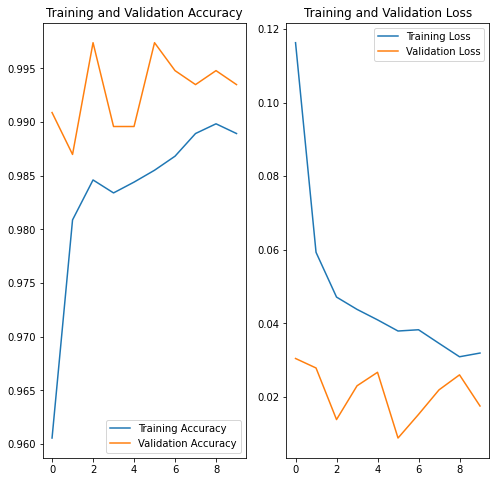

In [46]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

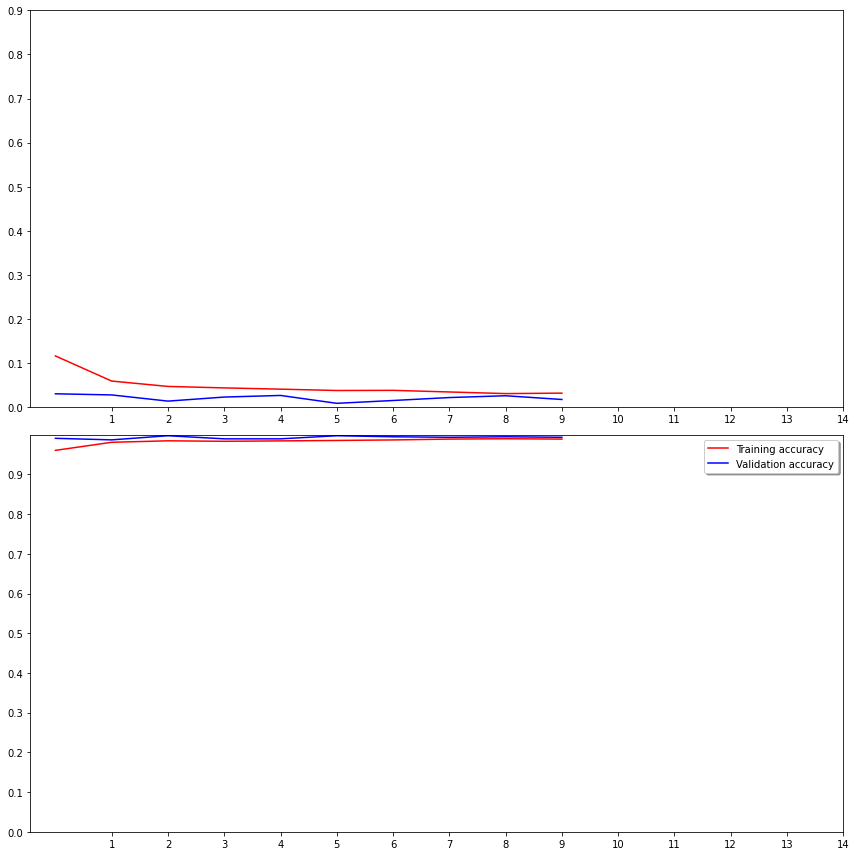

In [48]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))
ax1.plot(history.history["loss"], color= "red", label = "Training loss")
ax1.plot(history.history["val_loss"], color= "b", label = "Validation loss")

ax1.set_xticks(np.arange(1, epochs+5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history["accuracy"], color = "red", label = "Training accuracy")
ax2.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy")

ax2.set_xticks(np.arange(1,epochs+5, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc = "best", shadow = True)
plt.tight_layout()
plt.show()

## Load the model.h5 to Predicte the breed of New Images from any source if dogs or cats..

In [49]:
# To show the class of each breed.
train_generator.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [50]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [51]:
# Look at the class 
!cat labels.txt

WithMask
WithoutMask

## Convert to TFLite

### Saved the model using tf.saved_model.save and then convert the saved model to a tf lite compatible format.

In [52]:
saved_model_dir = 'fine_tuning_mobilenetv2'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: fine_tuning_mobilenetv2/assets


## Download the converted model and labels

In [54]:
# Choose the best model of the training process
model.save('model.06-0.01.h5')

In [53]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')
files.download('model.06-0.01.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
# Save the model and variables
!zip -r fine_tuning_mobilenetv2.zip fine_tuning_mobilenetv2
files.download("fine_tuning_mobilenetv2.zip")

  adding: fine_tuning_mobilenetv2/ (stored 0%)
  adding: fine_tuning_mobilenetv2/variables/ (stored 0%)
  adding: fine_tuning_mobilenetv2/variables/variables.index (deflated 76%)
  adding: fine_tuning_mobilenetv2/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: fine_tuning_mobilenetv2/assets/ (stored 0%)
  adding: fine_tuning_mobilenetv2/saved_model.pb (deflated 93%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Prediction 

In [56]:
# Import the libraires
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import numpy as np

In [57]:
# Show the images that we will use to detect wearing mask or not?.
def Mask_Detection(url):
    tf.function(experimental_relax_shapes=True)
    image_width, image_height = 224, 224
    img = image.load_img(url, target_size=(image_width, image_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    model = load_model('model.06-0.01.h5')
    # prediction = model.predict_classes(img)
    show=Image(filename=url, width= image_width,height= image_height) 
    prediction= np.argmax(model.predict(img), axis=-1)
    if prediction[0] ==1:
        print('WithoutMask')
    else:
        print('WithMask')
    return show

WithMask


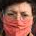

In [58]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1163.png')


WithMask


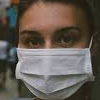

In [59]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/153.png')

WithMask


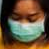

In [60]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1407.png')

WithMask


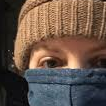

In [61]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1439.png')

WithoutMask


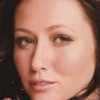

In [62]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1014.png')

WithoutMask


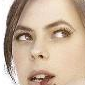

In [64]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1188.png')

WithoutMask


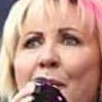

In [65]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1000.png')